In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.datasets import load_iris


In [2]:
class NeuralNet:
    def __init__(self):
        iris = load_iris()
        self.raw_input = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
        self.label_encoder = LabelEncoder()
        self.raw_input['target'] = self.label_encoder.fit_transform(self.raw_input['target'])

    def preprocess(self):
        scaler = StandardScaler()
        self.processed_data = pd.DataFrame(scaler.fit_transform(self.raw_input), columns=self.raw_input.columns)
        return 0

    def train_evaluate(self):
        ncols = len(self.processed_data.columns)
        nrows = len(self.processed_data.index)
        X = self.processed_data.iloc[:, 0:(ncols - 1)]
        y = self.processed_data.iloc[:, (ncols - 1)]
        y = tf.keras.utils.to_categorical(y, num_classes=3)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        # Hyperparameters
        activations = ['relu', 'tanh']
        optimizers = ['adam', 'sgd']
        losses = ['categorical_crossentropy', 'mean_squared_error']
        epochs = [50, 100]
        results = []
        num_plots = len(activations) * len(optimizers) * len(losses) * len(epochs)
        fig, axes = plt.subplots(nrows=num_plots//2, ncols=2, figsize=(15, num_plots * 2))

        plot_idx = 0

        for activation in activations:
            for optimizer in optimizers:
                for loss in losses:
                    for epoch in epochs:
                        model = Sequential()
                        model.add(Input(shape=(X_train.shape[1],)))
                        model.add(Dense(8, activation=activation))
                        model.add(Dense(4, activation=activation))
                        model.add(Dense(3, activation='softmax'))

                        model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
                        history = model.fit(X_train, y_train, epochs=epoch, batch_size=10, validation_data=(X_test, y_test), verbose=0)

                        train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
                        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

                        results.append({
                            'activation': activation,
                            'optimizer': optimizer,
                            'loss': loss,
                            'epochs': epoch,
                            'train_acc': train_acc,
                            'test_acc': test_acc,
                            'train_loss': train_loss,
                            'test_loss': test_loss,
                            'history': history.history
                        })

                        ax = axes.flat[plot_idx]
                        ax.plot(history.history['accuracy'], label='Train Accuracy')
                        ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
                        ax.set_title(f'{activation}-{optimizer}-{loss}-{epoch} epochs')
                        ax.set_ylabel('Accuracy')
                        ax.set_xlabel('Epoch')
                        ax.legend(loc='upper left')
                        plot_idx += 1

        plt.tight_layout()
        plt.show()

        results_df = pd.DataFrame(results)
        results_df = results_df[['activation', 'optimizer', 'loss', 'epochs', 'train_acc', 'test_acc', 'train_loss', 'test_loss']]
        results_df.columns = ['Activation', 'Optimizer', 'Loss Function', 'Epochs', 'Training Accuracy', 'Testing Accuracy', 'Training Loss', 'Testing Loss']
        print(results_df)

In [3]:
neural_net = NeuralNet()
neural_net.preprocess()


0

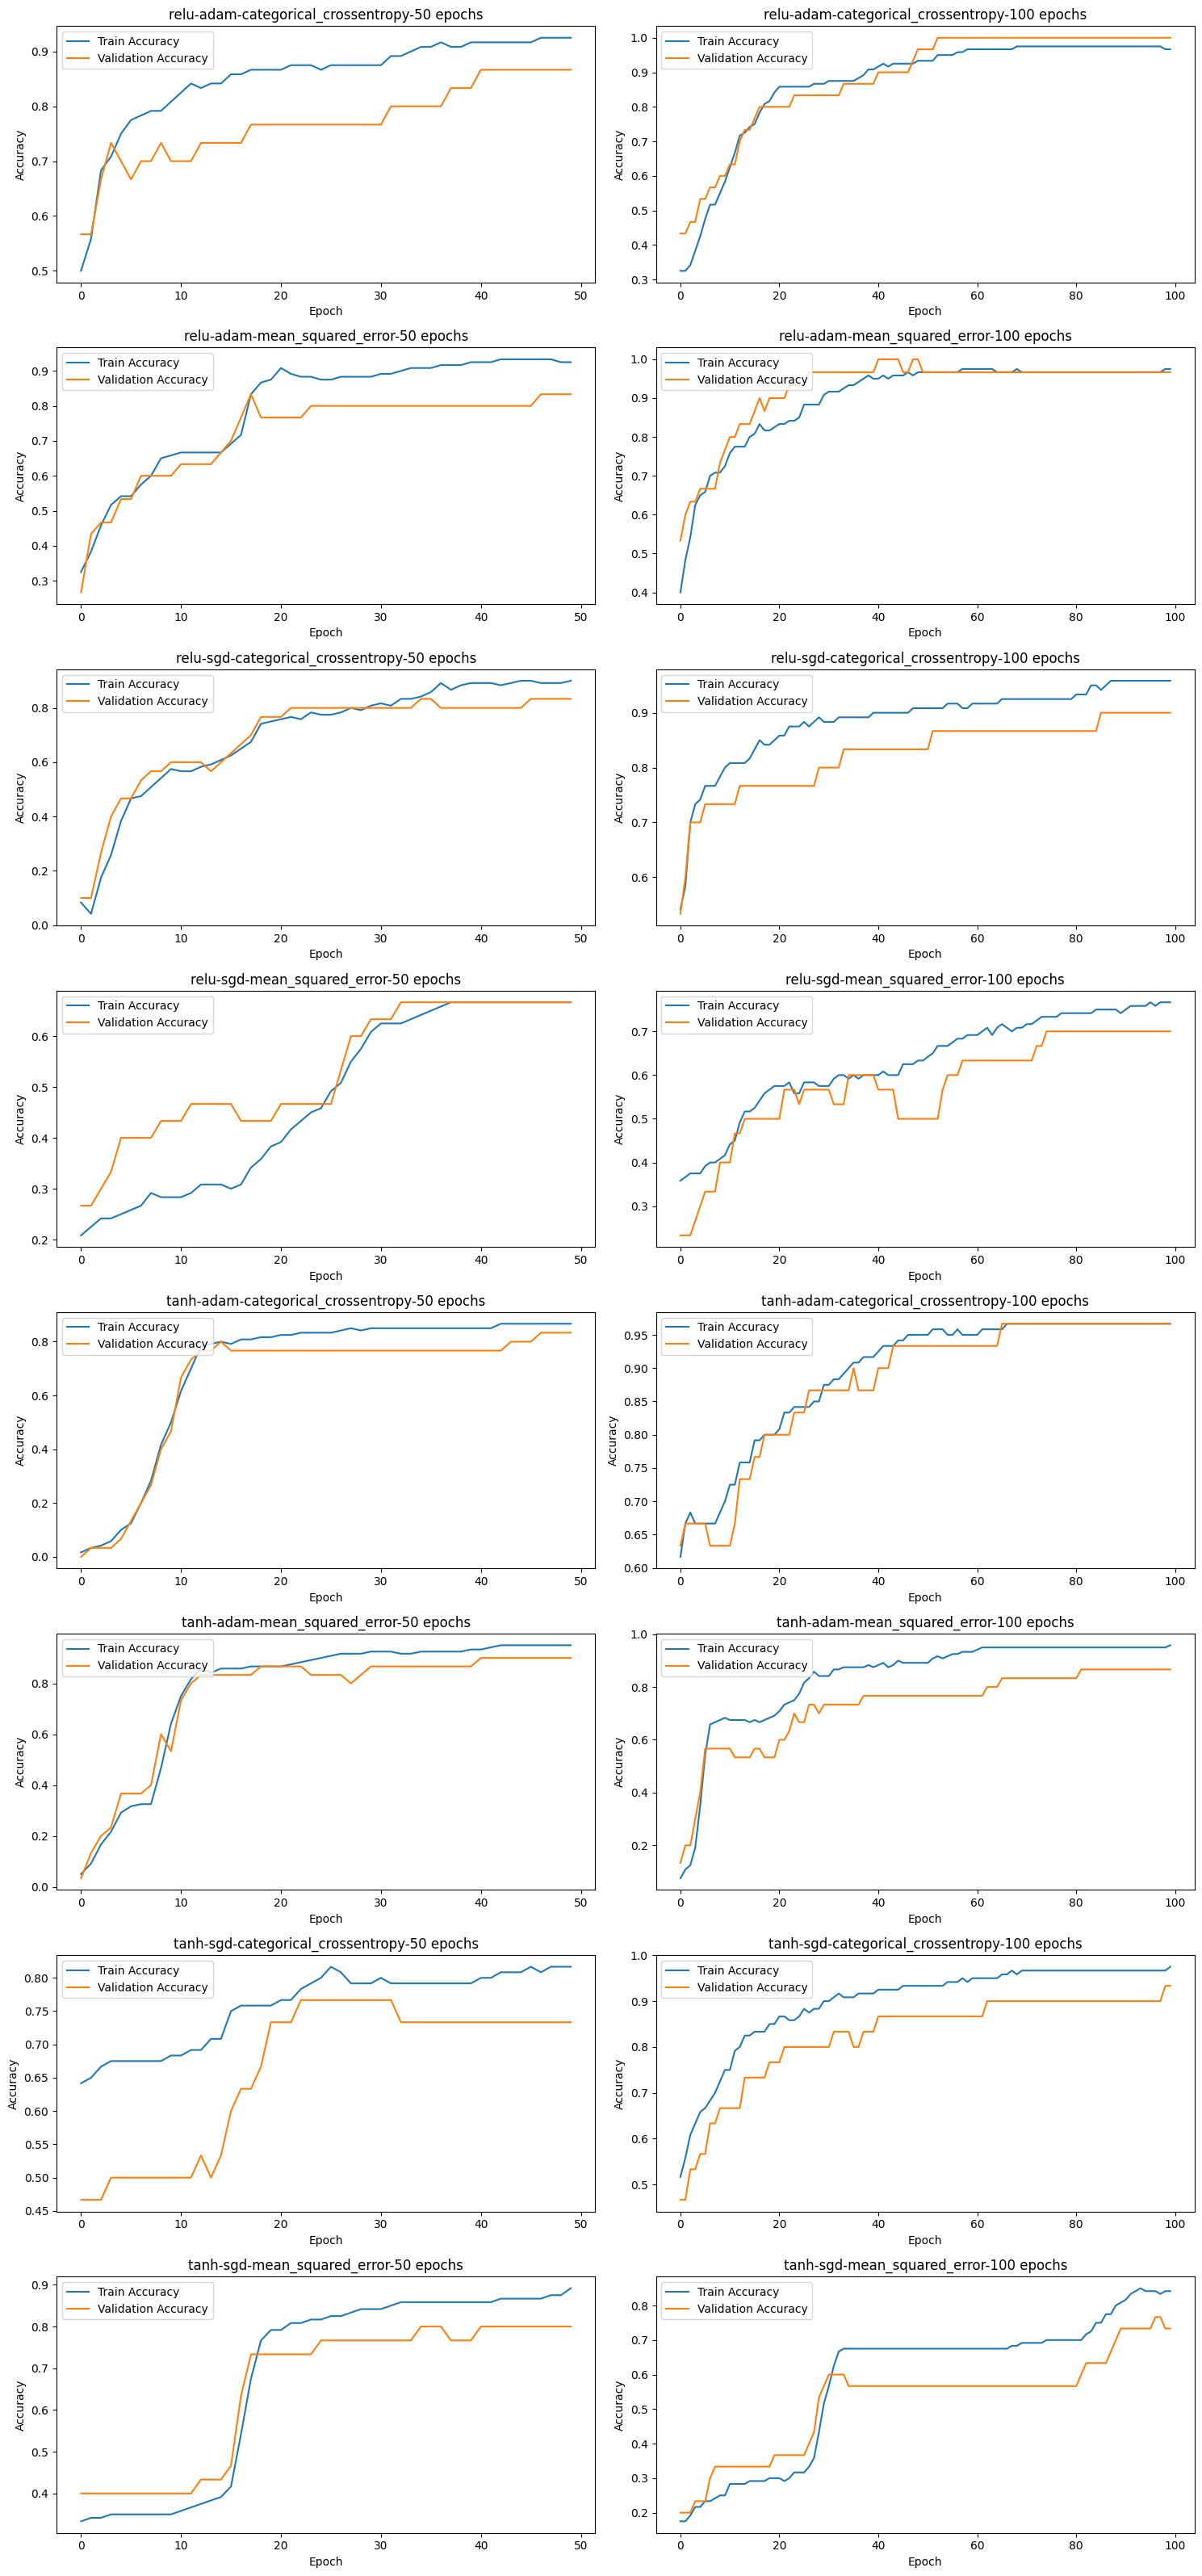

   Activation Optimizer             Loss Function  Epochs  Training Accuracy  \
0        relu      adam  categorical_crossentropy      50           0.925000   
1        relu      adam  categorical_crossentropy     100           0.975000   
2        relu      adam        mean_squared_error      50           0.933333   
3        relu      adam        mean_squared_error     100           0.975000   
4        relu       sgd  categorical_crossentropy      50           0.908333   
5        relu       sgd  categorical_crossentropy     100           0.958333   
6        relu       sgd        mean_squared_error      50           0.666667   
7        relu       sgd        mean_squared_error     100           0.766667   
8        tanh      adam  categorical_crossentropy      50           0.866667   
9        tanh      adam  categorical_crossentropy     100           0.966667   
10       tanh      adam        mean_squared_error      50           0.950000   
11       tanh      adam        mean_squa

In [4]:
neural_net.train_evaluate()